# Your First Quantum Bayesian Network Of the Technology Acceptance Model

**A practical guide to creating a quantum system for a real-world problem**

The code inside this notebook creates a Quantum Bayesian Network of the Technology Acceptance Model. You can learn about all the details in the course [Quantum Computing As Probabilistic Programming](https://www.pyqml.com/module/probabilistic-programming).

If you're not a PyQML member already, you can sign-up [here](https://www.pyqml.com/) and read the posts of this course for free!


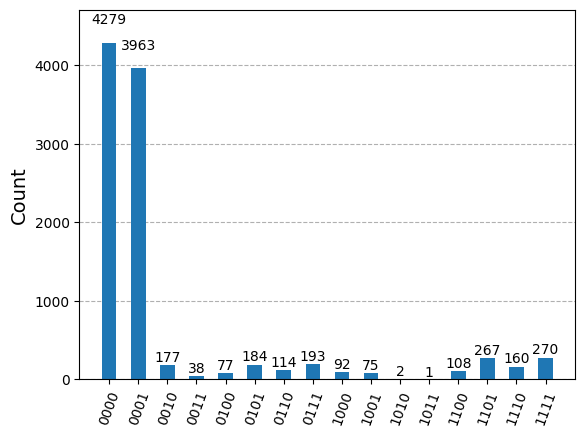

In [6]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from math import asin, sqrt

# Create a quantum circuit with 4 qubits
qc = QuantumCircuit(4)


def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))

# sepcify the marginal probabilities
usefulness = 0.5

# Apply the marginal probabilities
qc.ry(prob_to_angle(usefulness), 0)

# sepcify the marginal probabilities
ease_of_use = 0.1

# Apply the marginal probabilities
qc.ry(prob_to_angle(ease_of_use), 1)

# Specify the conditional probabilities
intention_easy_useful = 0.9
intention_noeasy_useful = 0.6
intention_easy_nouseful = 0.1
intention_noeasy_nouseful = 0.04

# easy to use and useful
qc.mcry(prob_to_angle(intention_easy_useful), [0, 1], 2)

# not easy to use but useful
qc.x(0)
qc.mcry(prob_to_angle(intention_noeasy_useful), [0, 1], 2)
qc.x(0)

# easy to use but not useful
qc.x(1)
qc.mcry(prob_to_angle(intention_easy_nouseful), [0, 1], 2)
qc.x(1)

# not easy to use and not useful
qc.x(0)
qc.x(1)
qc.mcry(prob_to_angle(intention_noeasy_nouseful), [0, 1], 2)
qc.x(0)
qc.x(1)

# Specify the conditional probabilities
actualuse_with_intention = 0.6
actualuse_with_nointention = 0.02  

# apply the conditional probability
# when the user intends to use the system
qc.cry(prob_to_angle(actualuse_with_intention), 2, 3)

# apply the conditional probability
# when the user does not intend to use the system
qc.x(2)
qc.cry(prob_to_angle(actualuse_with_nointention), 2, 3)
qc.x(2)


qc.measure_all()

backend = BasicSimulator()
# If you do not specify the number of shots, the default is 1024
result = backend.run(qc, shots=10000).result()   

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts)